## Imports


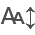

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from itables import init_notebook_mode
import itables

init_notebook_mode(all_interactive=True)

## Data loading

In [2]:
df = pd.read_excel('who_aap_2021_v9_11august2022.xlsx', sheet_name='AAP_2022_city_v9')

In [3]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

## Data review

In [4]:
# how the data looks like
itables.show(df)

In [5]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [6]:
# correcting year data type
#df['Measurement Year'] = pd.to_datetime(df['Measurement Year'])

In [7]:
# basic statictics
df.describe()

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count      32191.000000   15048.000000  21109.000000  22200.000000   
mean        2015.579354      22.920320     30.533252     20.619336   
std            2.752654      17.925906     29.312756     12.133388   
min         2000.000000       0.010000      1.040000      0.000000   
25%         2014.000000      10.350000     16.980000     12.000000   
50%         2016.000000      16.000000     22.000000     18.800000   
75%         2018.000000      31.000000     31.300000     27.160000   
max         2021.000000     191.900000    540.000000    210.680000   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                 7275.000000                 5381.000000   
mean                    90.794096                   90.583500   
std                     14.872681                   13.816311   
min                      0.000000                    2.568493   
25%                     88.595890                   87.945205   
50%                     97.000000                   96.039000   
75%                     99.000000                   98.938000   
max                    100.000000                  100.000000   

       NO2 temporal coverage (%)  Version of the database  Status  
count               19890.000000             32191.000000     0.0  
mean                   93.696804              2021.744214     NaN  
std                    10.451751                 1.051897     NaN  
min                     1.923077              2016.000000     NaN  
25%                    93.207763              2022.000000     NaN  
50%                    96.369863              2022.000000     NaN  
75%                    98.926941              2022.000000     NaN  
max                   100.000000              2022.000000     NaN

## Handling NaNs

In [8]:
# NANs
print("Number of rows in the dataframe:", len(df))
df.isna().sum()

Number of rows in the dataframe: 32191


WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

Status column consists only of NaNs - it can be safely deleted. WHO Region and Reference columns have unusually small amount of NaNs (<5%), those rows can be filled with proper information (WHO Region - European Region for Liechtenstein) or dropped (Reference - no info about how to fill those). Other columns have many NaN values (circa > 10 000) so they will be left as they are.

In [9]:
# deleting Status column
df.drop(columns=['Status'], inplace=True)

In [10]:
print(df["WHO Region"].unique()) # to check how EU is called - 'European Region'
df.loc[df["WHO Region"].isna(), "WHO Region"] = 'European Region'

['Eastern Mediterranean Region' 'European Region' 'Region of the Americas'
 'Western Pacific Region' 'South East Asia Region' 'African Region' nan]


In [11]:
df.loc[df["Reference"].isna(), :] # ISO3 = QAT

WHO Region ISO3 WHO Country Name City or Locality  \
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
28209              2017           44.0         148.0         29.0   
28210              2018           44.0         181.0         47.0   
28211              2019           41.0         208.0         42.0   
28212              2020           33.0         108.0         28.0   
28213              2021           38.0         150.0         30.0   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
28209                        98.0                        96.0   
28210                        99.0                        97.0   
28211                        97.0                        97.0   
28212                        98.0                        98.0   
28213                        97.0                        96.0   

       NO2 temporal coverage (%) Reference  \
28209                       99.0       NaN   
28210                       99.0       NaN   
28211                       99.0       NaN   
28212                       99.0       NaN   
28213                       99.0       NaN   

          Number and type of monitoring stations  Version of the database  
28209  Roadside, residential and commercial area                     2022  
28210  Roadside, residential and commercial area                     2022  
28211  Roadside, residential and commercial area                     2022  
28212  Roadside, residential and commercial area                     2022  
28213  Roadside, residential and commercial area                     2022

In [12]:
df.loc[df["ISO3"]=="QAT", :]

WHO Region ISO3 WHO Country Name City or Locality  \
28208  Eastern Mediterranean Region  QAT            Qatar         Al-Bidda   
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   
28214  Eastern Mediterranean Region  QAT            Qatar   Madinat Khaifa   
28215  Eastern Mediterranean Region  QAT            Qatar         Muaither   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
28208              2016           33.0         110.0          NaN   
28209              2017           44.0         148.0         29.0   
28210              2018           44.0         181.0         47.0   
28211              2019           41.0         208.0         42.0   
28212              2020           33.0         108.0         28.0   
28213              2021           38.0         150.0         30.0   
28214              2016           45.0         189.0          NaN   
28215              2016           36.0         120.0          NaN   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
28208                         NaN                         NaN   
28209                        98.0                        96.0   
28210                        99.0                        97.0   
28211                        97.0                        97.0   
28212                        98.0                        98.0   
28213                        97.0                        96.0   
28214                         NaN                         NaN   
28215                         NaN                         NaN   

       NO2 temporal coverage (%)                                    Reference  \
28208                        NaN  Ministry of Municipal and Environment (MME)   
28209                       99.0                                          NaN   
28210                       99.0                                          NaN   
28211                       99.0                                          NaN   
28212                       99.0                                          NaN   
28213                       99.0                                          NaN   
28214                        NaN             Ministry of Public Health (MOPH)   
28215                        NaN  Ministry of Municipal and Environment (MME)   

          Number and type of monitoring stations  Version of the database  
28208                                residential                     2018  
28209  Roadside, residential and commercial area                     2022  
28210  Roadside, residential and commercial area                     2022  
28211  Roadside, residential and commercial area                     2022  
28212  Roadside, residential and commercial area                     2022  
28213  Roadside, residential and commercial area                     2022  
28214                                residential                     2018  
28215                                residential                     2018

In [13]:
df.dropna(subset=["Reference"],inplace=True)

In [14]:
# Double-checking
print("Number of rows in the dataframe:", len(df))
df.isna().sum()

Number of rows in the dataframe: 32186


WHO Region                                    0
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     0
Number and type of monitoring stations    23433
Version of the database                       0
dtype: int64

## Visualizations

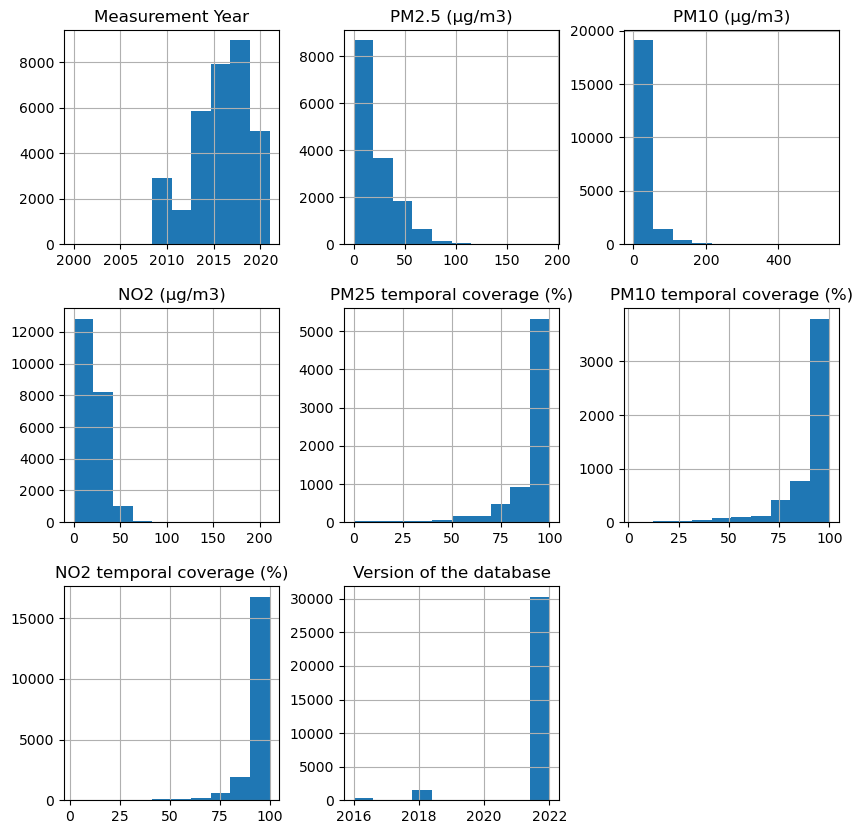

In [15]:
df.hist(figsize=(10, 10))
plt.show()

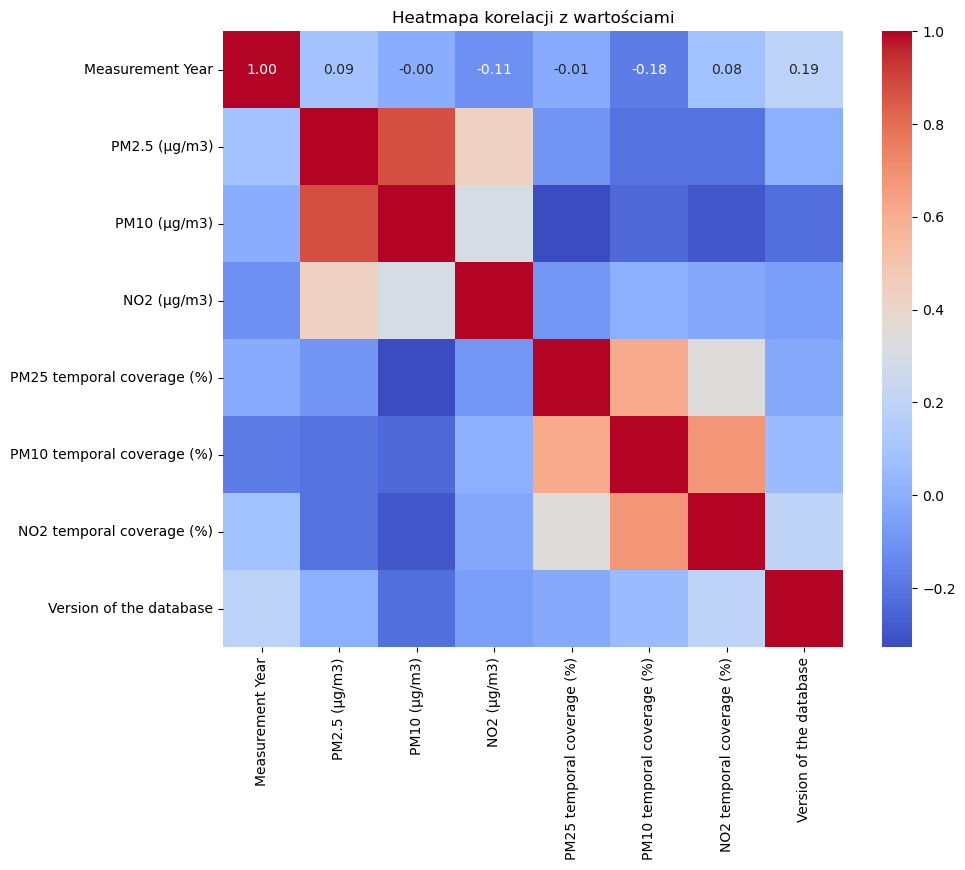

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmapa korelacji z wartościami')
plt.show()

## Region analysis

In [17]:
len(df['WHO Region'].unique())

6

c:\Users\Lenovo\anaconda3\envs\ML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


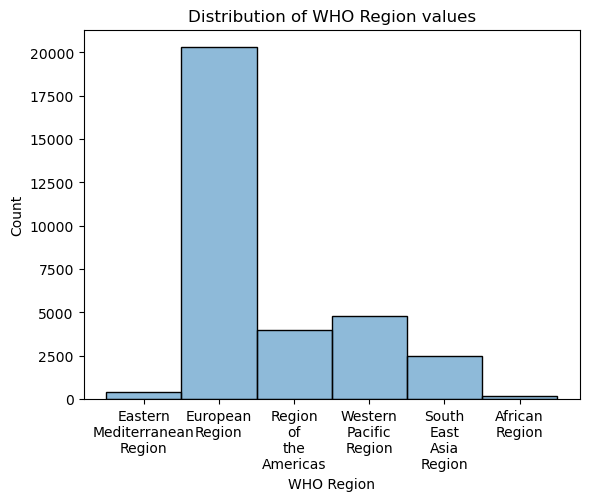

In [18]:
x_ticks = [x.replace(" ", "\n") for x in df["WHO Region"].unique()]
sns.histplot(data=df, x="WHO Region",bins=20, alpha=0.5)
plt.xticks(ticks=np.arange(len(x_ticks)),labels=x_ticks)
plt.title(f'Distribution of WHO Region values')
plt.show()


c:\Users\Lenovo\anaconda3\envs\ML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\Lenovo\anaconda3\envs\ML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\envs\ML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


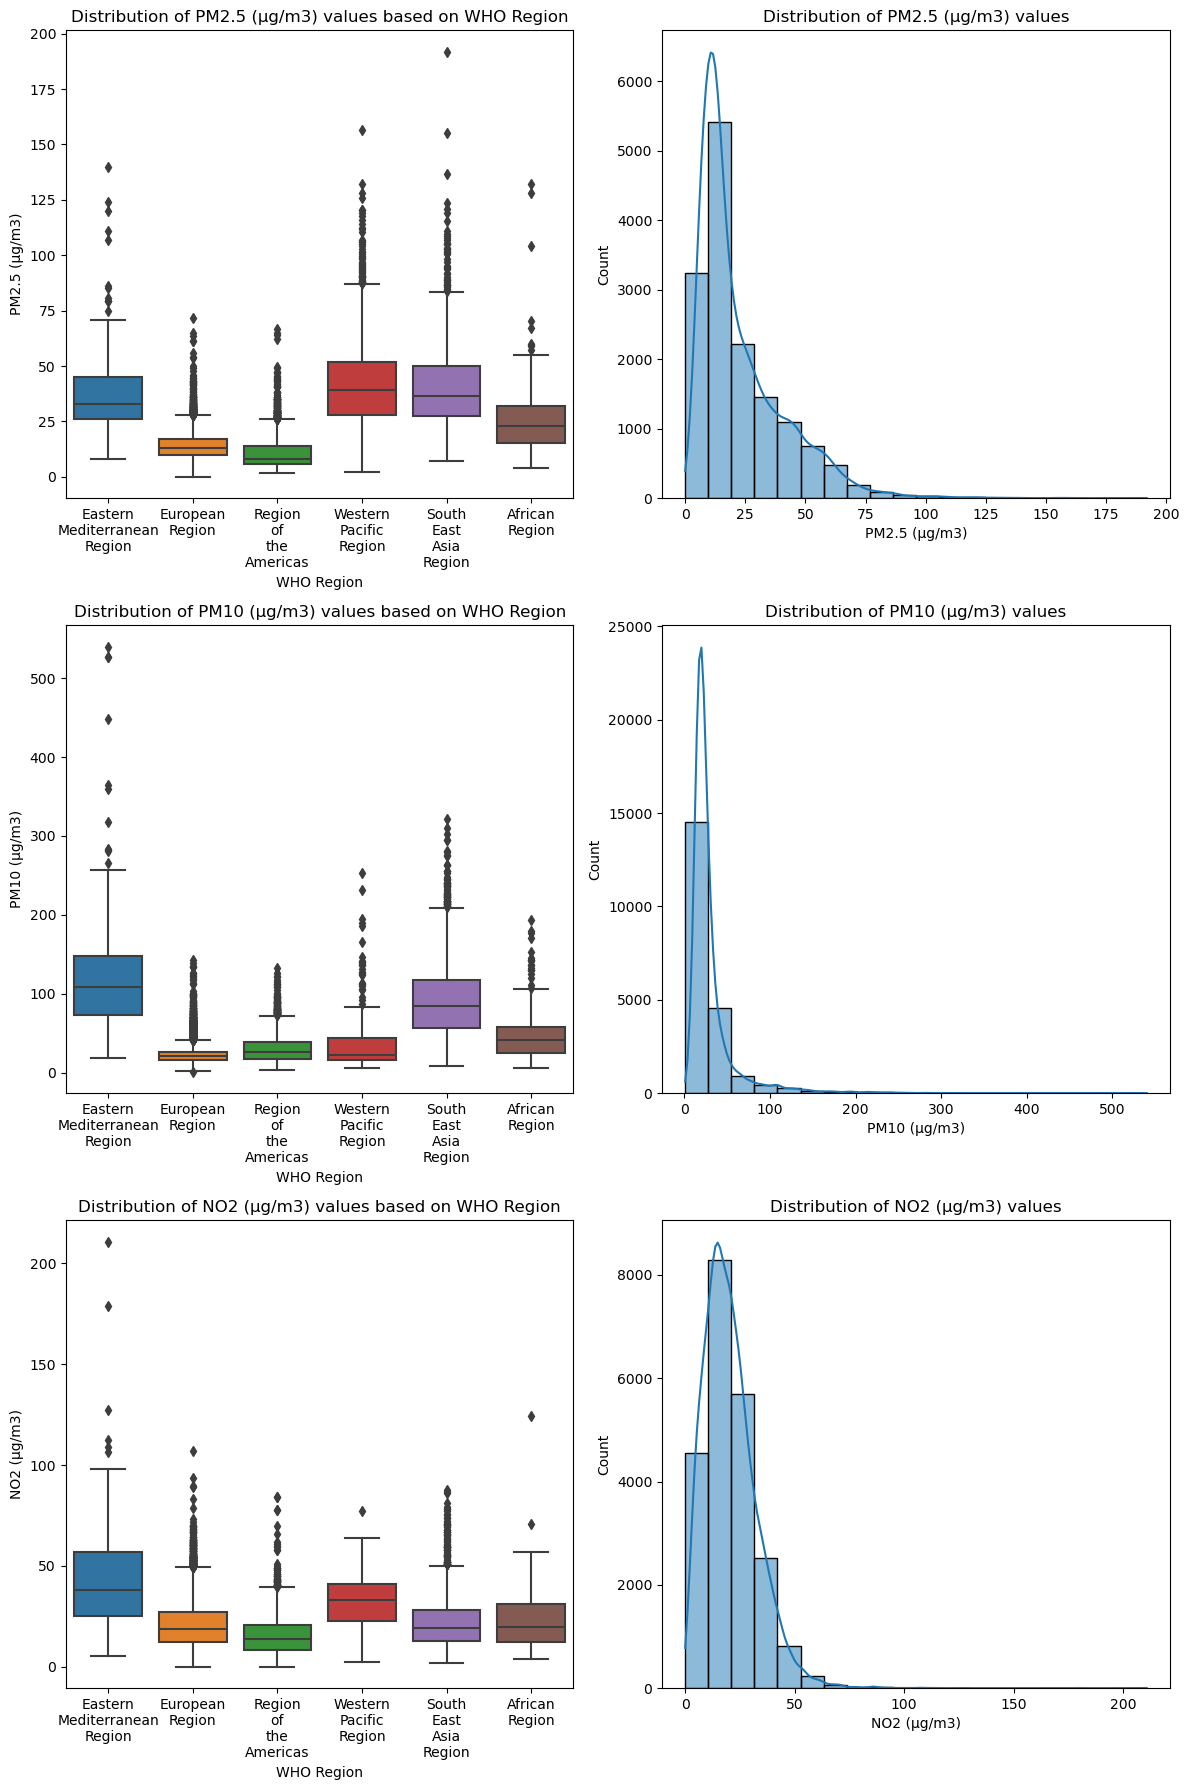

In [19]:
columns = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']

fig, ax = plt.subplots(3,2, figsize=(12,18))

for i, column in enumerate(columns):   
    sns.boxplot(data=df, y=column, x='WHO Region', ax=ax[i,0])
    ax[i,0].set_xticks(ticks=np.arange(len(x_ticks)), labels=x_ticks)
    ax[i,0].set_title(f'Distribution of {column} values based on WHO Region')

    sns.histplot(data=df, x=column, kde=True, bins=20, ax=ax[i,1], alpha=0.5)
    ax[i,1].set_title(f'Distribution of {column} values')

plt.tight_layout()
plt.show()


## Country analysis

In [20]:
len(df['WHO Country Name'].unique())

118

## City analysis

In [21]:
len(df['City or Locality'].unique())

6873

## Map Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18288\2858832224.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


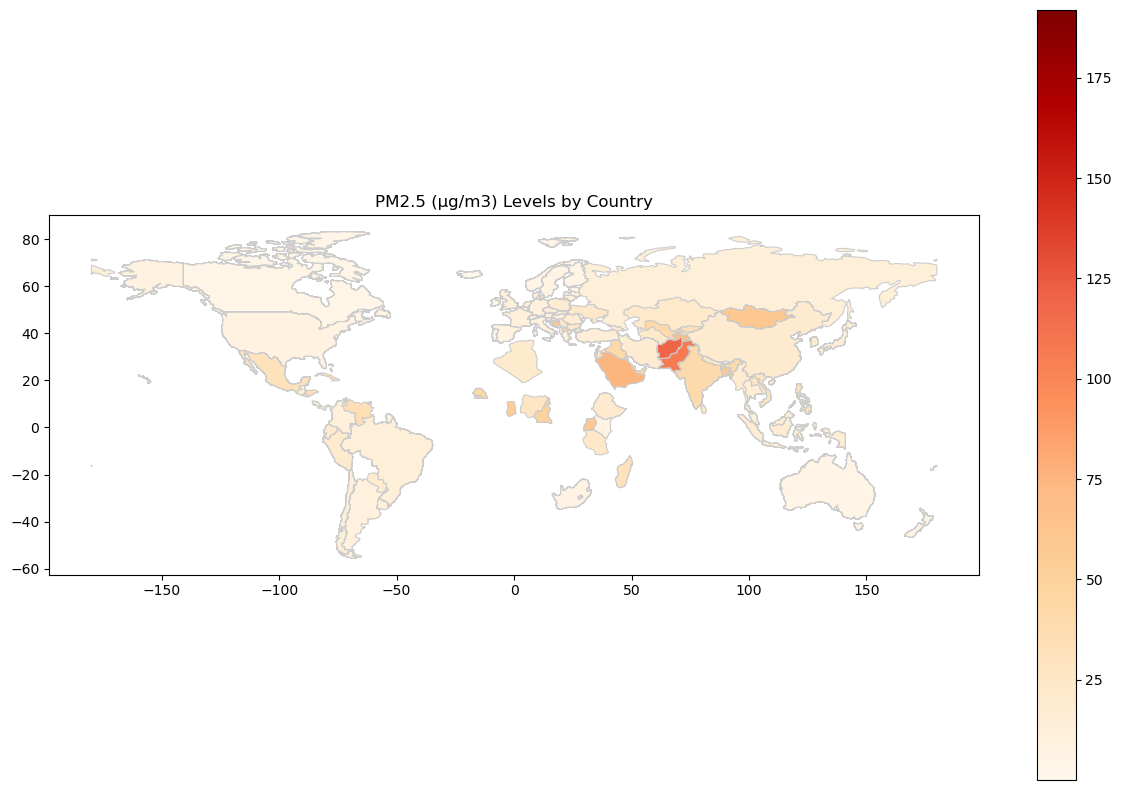

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18288\2858832224.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


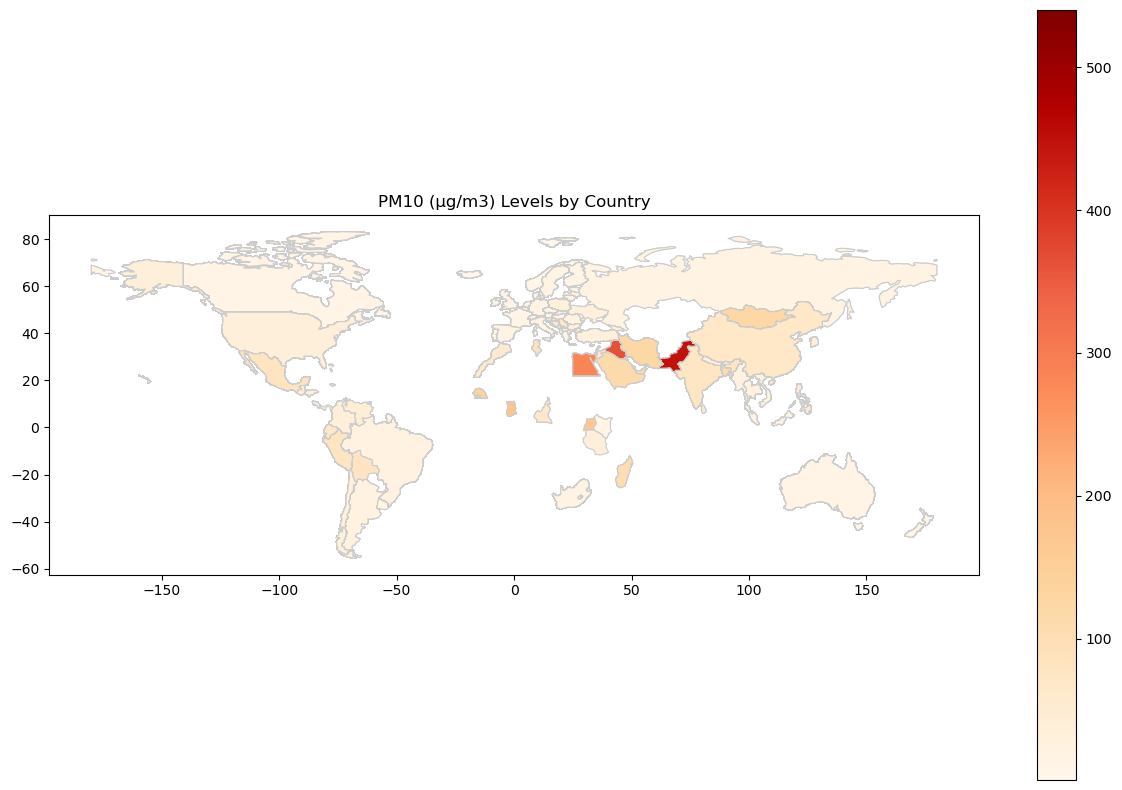

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18288\2858832224.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


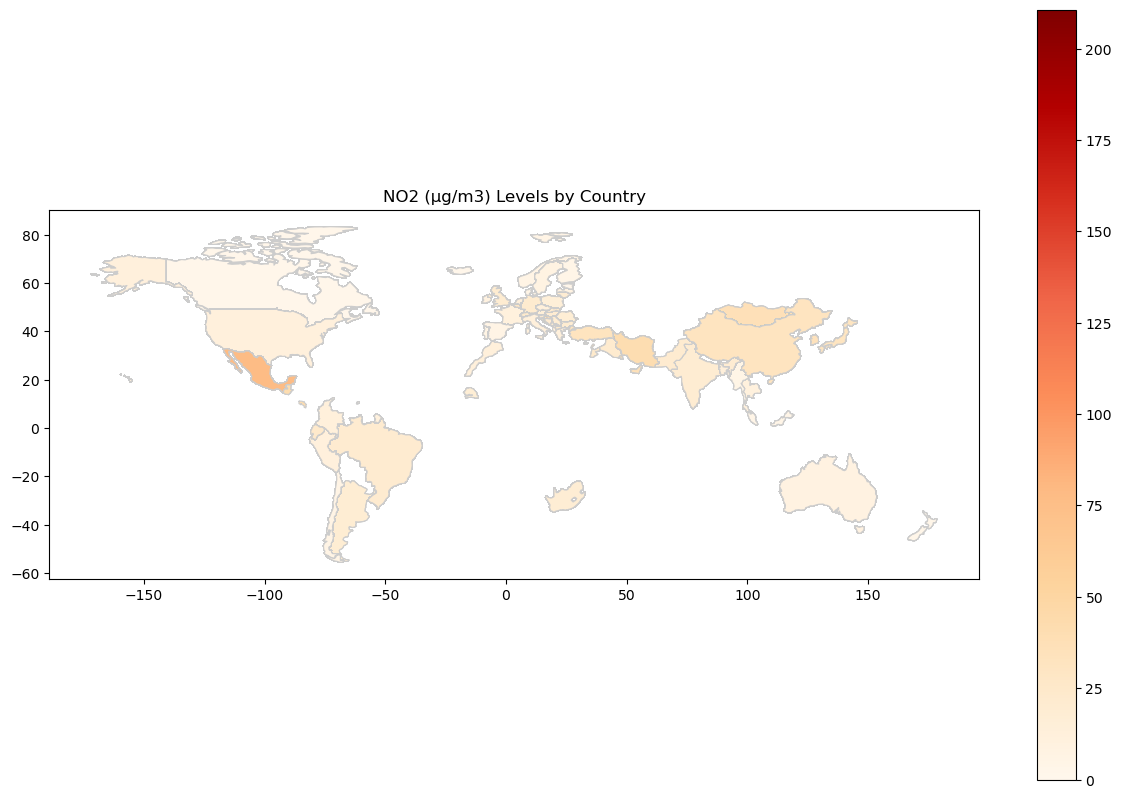

In [22]:
for c in columns:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    merged_data = world.merge(df, how='left', left_on='iso_a3', right_on='ISO3')
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(column=c, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{c} Levels by Country')
    plt.show()